## **Descripción del Proyecto**
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

(Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.)

El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de Clasificación de Software de Entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## **Descripción de datos**
- Name (Nombre)
- Platform (Plataforma)
- Year_of_Release (Año de lanzamiento)
- Genre (Género)
- NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
- EU_sales (ventas en Europa en millones de dólares estadounidenses)
- JP_sales (ventas en Japón en millones de dólares estadounidenses)
- Other_sales (ventas en otros países en millones de dólares estadounidenses)
- Critic_Score (máximo de 100)
- User_Score (máximo de 10)
- Clasificación (ESRB)

**¡VAMOS CON EL ANÁLISIS!**

In [ ]:
#importamos las librerias
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import levene
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#cargamos el dataset
try:
    df_games = pd.read_csv('games.csv', sep=',')
except:
    df_games = pd.read_csv('/datasets/games.csv', sep=',')

### **1. PREPROCESAMIENTO DE DATOS**

In [ ]:
#mostramos la información general de la tabla
print(df_games.info())
print()
#mostramos si hay duplicados
print('Cantidad de duplicados: ', df_games.duplicated().sum())
#mostramos las 5 primeras filas de la tabla
df_games.head()
# LOS TIPOS DE DATOS INCORRECTO SON year_of_release y user_score, también critc_score (pasar a entero), year lo pasamos a int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Cantidad de duplicados:  0


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
#mostramos los valores únicos de cada campo
columns = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating']
for column in columns:
    print(df_games[column].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26

Tenemos los siguiente problemas con nuestros datos iniciales:
- Los ``nombres de las columnas`` están con mayúsculas y minúsculas: pasaremos los nombres a minúsculas.
- Los tipos de datos son incorrectos en los siguientes campos:
  - ``year_of_release`` está como decimal: lo pasaremos a tipo entero.
  - ``critic_score`` está como decimal: lo pasaremos a entero.
  - `user_score` está como objeto: lo pasaremos a float.
- El campo `user_score` contiene un valor `tbd`(to be determined)
- Existen valores ausentes en los siguientes campos `name, year_of_release, genre, critic_score, user_score` y `rating`.

Vamos a solucionar estos inconvenientes antes de proceder con el análisis pertinente.

Primero solucionaremos el inconveniente con los valores ausentes y el valor `tbd` ya que no se puede hacer la conversión al tipo de dato correcto (entero o flotante) si la columna contiene valores ausentes o datos tipo cadena.

In [ ]:
#antes que todo mejoramos el formato del nombre de las columnas (todo a minúsculas)
df_games.columns= df_games.columns.str.lower().str.strip()

In [ ]:
#mostramos el porcentaje de nulos de cada columna y el porcentaje de los registro que tienen el valor 'tbd'
print('Porcentaje de nulos en el campo "año de lanzamiento": ', round(100*df_games.year_of_release.isna().sum()/len(df_games),2),'%') 
print('Porcentaje de nulos en el campo "nombre del juego": ', round(100*df_games.name.isna().sum()/len(df_games),2),'%')  
print('Porcentaje de nulos en el campo "género del juego": ', round(100*df_games.genre.isna().sum()/len(df_games),2),'%')  
print('Porcentaje de nulos en el campo "critic_score": ', round(100*df_games.critic_score.isna().sum()/len(df_games),2),'%')  
print('Porcentaje de nulos en el campo "user_score": ', round(100*df_games.user_score.isna().sum()/len(df_games),2),'%')  
print('Porcentaje de nulos en el campo "rating": ', round(100*df_games.rating.isna().sum()/len(df_games),2),'%')  
print('Porcentaje de registros con el valor "tbd": ', round(100*len(df_games[df_games.user_score == 'tbd'])/len(df_games),2),'%')  

Porcentaje de nulos en el campo "año de lanzamiento":  1.61 %
Porcentaje de nulos en el campo "nombre del juego":  0.01 %
Porcentaje de nulos en el campo "género del juego":  0.01 %
Porcentaje de nulos en el campo "critic_score":  51.32 %
Porcentaje de nulos en el campo "user_score":  40.09 %
Porcentaje de nulos en el campo "rating":  40.48 %
Porcentaje de registros con el valor "tbd":  14.5 %


De acuerdo a los porcentajes insignificantes, podemos eliminar los registros que contengan nulos de los campos `name, year_of_release` y ``genre`` ya que representan solo el 0.01%, 1.61% y 0.01% respectivamente.

In [ ]:
df_games.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

In [ ]:
#mostramos como quedan los porcentajes de nulos
print('Porcentaje de nulos en el campo "año de lanzamiento": ', round(100*df_games.year_of_release.isna().sum()/len(df_games),2),'%') 
print('Porcentaje de nulos en el campo "nombre del juego": ', round(100*df_games.name.isna().sum()/len(df_games),2),'%')  
print('Porcentaje de nulos en el campo "género del juego": ', round(100*df_games.genre.isna().sum()/len(df_games),2),'%')  
print('Porcentaje de nulos en el campo "critic_score": ', round(100*df_games.critic_score.isna().sum()/len(df_games),2),'%')  
print('Porcentaje de nulos en el campo "user_score": ', round(100*df_games.user_score.isna().sum()/len(df_games),2),'%')  
print('Porcentaje de nulos en el campo "rating": ', round(100*df_games.rating.isna().sum()/len(df_games),2),'%')  
print('Porcentaje de registros con el valor "tbd": ', round(100*len(df_games[df_games.user_score == 'tbd'])/len(df_games),2),'%')  

Porcentaje de nulos en el campo "año de lanzamiento":  0.0 %
Porcentaje de nulos en el campo "nombre del juego":  0.0 %
Porcentaje de nulos en el campo "género del juego":  0.0 %
Porcentaje de nulos en el campo "critic_score":  51.45 %
Porcentaje de nulos en el campo "user_score":  40.17 %
Porcentaje de nulos en el campo "rating":  40.6 %
Porcentaje de registros con el valor "tbd":  14.45 %


Ahora observamos que solo las columnas ``critic_score, user_score`` y `rating` tienen valores nulos cuyos porcentajes son bastante elevados, en el orden del 40% al 51%. En este caso no sería correcto imputar algún estadísico en reemplazo de los valores nulos de las columnas ``critic_score y user_score`` porque:
- En el caso de la columna `critic_score` más del 50% son nulos y calcular un estadístico solo con el otro 50% (datos no nulos) no sería representativo. Por lo que ``dejaremos los valores nulos como NaN``.
- En el caso de la columna `user_score`, aparte del 40.17% de nulos, el 14.45% de los datos tienen el texto `tbd`. Esto sumado al porcentaje de nulos hacen un total de 54.62%; esto quiere decir que ``más del 54% de los registros`` de la columna user_score no tienen los datos apropiados por lo que calcular un estadístico solo con el otro menos de 46% (datos no nulos) no sería representativo. Por lo que ``dejaremos los valores nulos como NaN y también reemplazaremos el texto tbd por NAN``.

En el caso de la columna `rating` el 40.6% son nulos. Al tratarse de un campo categórico ``reemplazaremos los nulos por la moda en base al género``.

In [ ]:
#mostramos los nulos de la columna rating
df_games[df_games.rating.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Observamos que los porcentajes de nulos de las columnas ``rating, user_score y critic_score`` son casi la misma. Esto se ve reflejado también en la tabla de arriba donde las tres últimas columnas tienen en común los registros que son valores nulos. Esto posiblemente se debe a:
1. Columna `rating`: cuando se lanzó el juego, este no tenía clasificación o estaba pendiente de ser clasificado.
2. Columna `user_score`: los usuarios no calificaron el juego porque este no había sido clasificado (poco probable que esto haya pasado ya que más del 50% de los datos no tiene calificación) o por el contrario si se realizó la calificación del juego pero los datos no fueron ingresados por olvido o porque el juego no tenía clasificación.
3. Columna `critic_score`: no existe calificación por las mismas razones de la columna user_score.

Ahora trataremos los valores nulos de acuerdo a lo indicado anteriormente.
1. Reemplazamos los nulos de `rating` con la moda en relación a la moda del género.
2. Reemplazamos `tbd` del campo user_score con valores nulos.

In [ ]:
#moda del campo genre
genre_mode = df_games.genre.mode()[0]
#reemplazamos los nulos por la moda de rating en base a la moda de genre
df_games['rating'] = df_games.rating.fillna(df_games.query('genre==@genre_mode')['rating'].mode()[0])

In [ ]:
#En lugar de `tbd` imputaremos valores nulos
df_games.user_score.replace('tbd', np.NaN, inplace=True)

Ahora cambiamos los tipos de datos incorrectos

In [ ]:
df_games['user_score'] = df_games['user_score'].astype('float')
df_games['year_of_release'] = df_games.year_of_release.astype('int')

In [ ]:
#mostramos la información general como quedaron nuestros datos
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Listo, nuestros datos son del tipo correcto y los únicos campos con valores nulos son `user_score y critic_score`. En resumen:
- Los nulos de las columnas `name y genre` se eliminaron ya que el porcentaje de nulos era ínfimo, por debajo de 0.01%. 
- También se eliminaron los nulos de la columna `year_of_release` que aunque su valores nulos representaban más que los nulos de name y genre, este valor aún seguía siendio bajo, 1.6% para ser exactos.
- Se reemplazo la cadena `tbd` del campo user_score por valores nulos.
- Los nulos de `user_score` al representar más de 56% no es idóneo eliminarlos ni tampoco es representativo reemplazarlos con algún estadístico como la media o mediana.
- Los nulos de `critic_score` al representar más de 50% no es idóneo eliminarlos ni tampoco es representativo reemplazarlos con algún estadístico como la media o mediana.
- Se reemplazó los nulos de la columna `rating` por la moda en relación al género.
- Se cambiaron los tipos de datos de las columnas `year_of_release y user_score`.

Ahora calcularemos las ventas totales en todas las regiones para cada juego y las agregaremos en una nueva columna.

In [ ]:
#ventas totales de cada juego en todas las regiones
df_games['total_sales'] = df_games.na_sales + df_games.eu_sales + df_games.jp_sales + df_games.other_sales
df_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9013,Okaeri! Chibi-Robo! Happy Richie Oosouji,DS,2009,Adventure,0.00,0.00,0.14,0.00,NaN,NaN,T,0.14
8009,Just Dance 2017,Wii,2016,Misc,0.06,0.11,0.00,0.01,NaN,NaN,E10+,0.18
8464,Sid Meier's Civilization IV,PC,2005,Strategy,0.02,0.12,0.00,0.03,94.0,8.3,E10+,0.17
9362,Azure Dreams,PS,1997,Role-Playing,0.07,0.05,0.00,0.01,NaN,NaN,T,0.13
6802,Harvest Moon: Magical Melody,GC,2005,Simulation,0.19,0.05,0.00,0.01,83.0,8.9,E,0.25
12931,MLB SlugFest 2006,XB,2006,Sports,0.04,0.01,0.00,0.00,59.0,NaN,E10+,0.05
10011,Lost Horizon,PC,2010,Adventure,0.00,0.10,0.00,0.02,77.0,7.9,T,0.12
14200,"Crouching Tiger, Hidden Dragon",GBA,2003,Action,0.02,0.01,0.00,0.00,60.0,NaN,T,0.03
1156,Silent Hill,PS,1999,Action,0.71,0.48,0.30,0.10,86.0,9.2,M,1.59
549,Pokémon Stadium 2,N64,2000,Strategy,1.02,0.36,1.13,0.23,NaN,NaN,T,2.74


### **2. ANÁLISIS DE DATOS**

#### 2.1 Calcularemos cuantos juegos fueron lanzados en diferentes años y determinaremos si son significativos los datos de cada período.

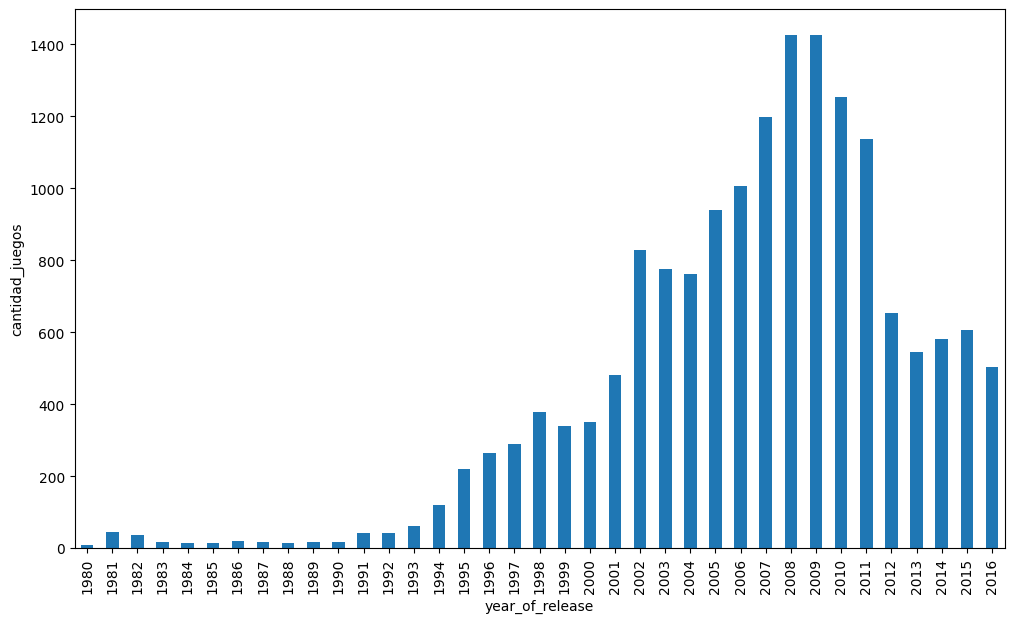

In [ ]:
df_games.groupby('year_of_release')['name'].count().plot(kind='bar', ylabel='cantidad_juegos', figsize=(12,7))
plt.show()

Se observa del gráfico que:
- Desde 1980 hasta 1993, la cantidad de juegos lanzados anualmente no era muy alto y permanecía cosntante en ese tramo de tiempo.
- A partir de 1994 la cantidad de juegos comienza a aumentar gradualmente año tras año hasta el 2008 y 2009, que es donde se lanza la mayor cantida de juegos, más de 1400 juegos se lanzaron en cada uno de esos dos años.
- A partir del año 2010, la cantidad de juegos que se lanzaban cada año comienza a disminuir; bajando de golpe a casi la mitad la cantidad de juegos lanzados el año 2012 respecto al año 2010 y 2011.
- Desde el 2012 hasta el 2016 la caída no es tan brusca pero también disminuyó levemente la cantidad de juegos lanzados siendo la cantidad de juegos lanzados en el 2016 prácticamente la misma cantidad que se lanzó en el 2001.
- Los datos más significativos, respecto a la cantidad de juegos lanzados, se encuentran entre los años 2002 y 2011 lanzándose más de 800 juegos anualmente.
- Los años de gloria fueron el 2007, 2008, 2009, 2010 y 2011. La cantida de juegos en  este período fueron más de 1100 por año.

#### 2.2 Analizamos como varian las ventas totales de una plataforma a otra

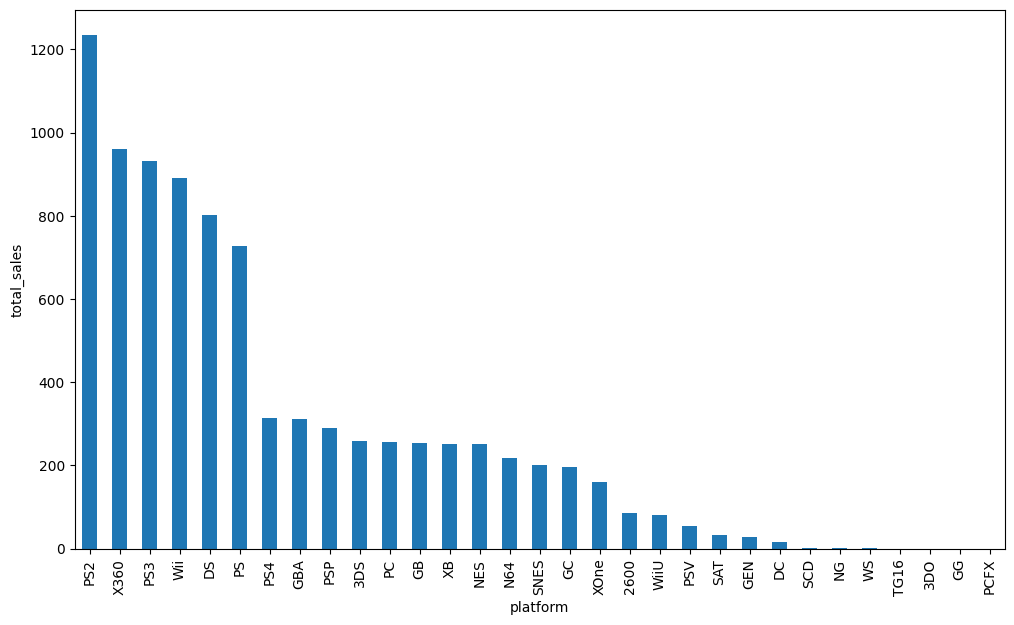

In [ ]:
df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', ylabel='total_sales', figsize=(12,7))
plt.show()

Se observa de la gráfica que las plataformas con las mayores ventas totales son `PS2, X360, PS3, Wii, DS y PS` con más de USD$700 millones siendo la plataforma `PS2` la que posee la mayor cantidad de ventas superando los USD$1200 millones.

Realizaremos una distribución basada en los datos de cada año con las 6 plataformas con más ventas: `PS2, X360, PS3, Wii, DS y PS`

In [ ]:
#creamos una nueva variable que solo contenga las plataformas con más ventas
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
most_sales = df_games[df_games.platform.isin(platforms)]

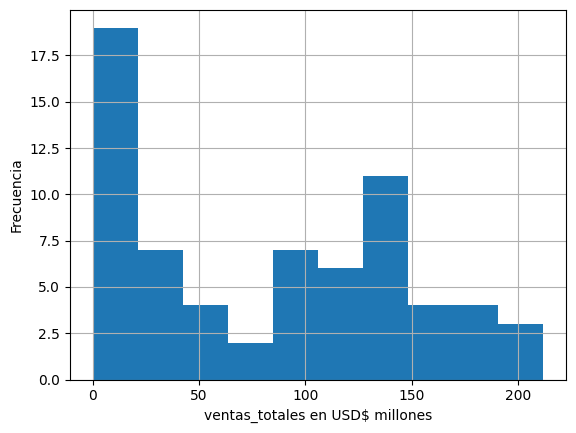

In [ ]:
#graficamos la ventas totales por año de las 6 plataformas con más ventas
most_sales.groupby(['year_of_release', 'platform'])['total_sales'].sum().hist(bins=10)
plt.xlabel('ventas_totales en USD$ millones')
plt.ylabel('Frecuencia')
plt.show()

Se observa del histograma que es más común los ingresos entre 0 a 20 millones de dólares, seguido de entre 120 a 140 millones de dólares, seguido de 20 a 40 millones de dólares y de 80 a 120 millones de dólares.

Buscamos las plataformas que solían ser populares pero que ahora no tienen ventas y responder la pregunta: ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?.

Al ser muchas plataformas, todas se verían amontonadas en una sola gráfica; así que realizaremos gráficas por grupos de 6 o 7 plataformas, de esa manera el gráfico se verá más limpio y fácil de interpretar para respnder a la pregunta planteada.

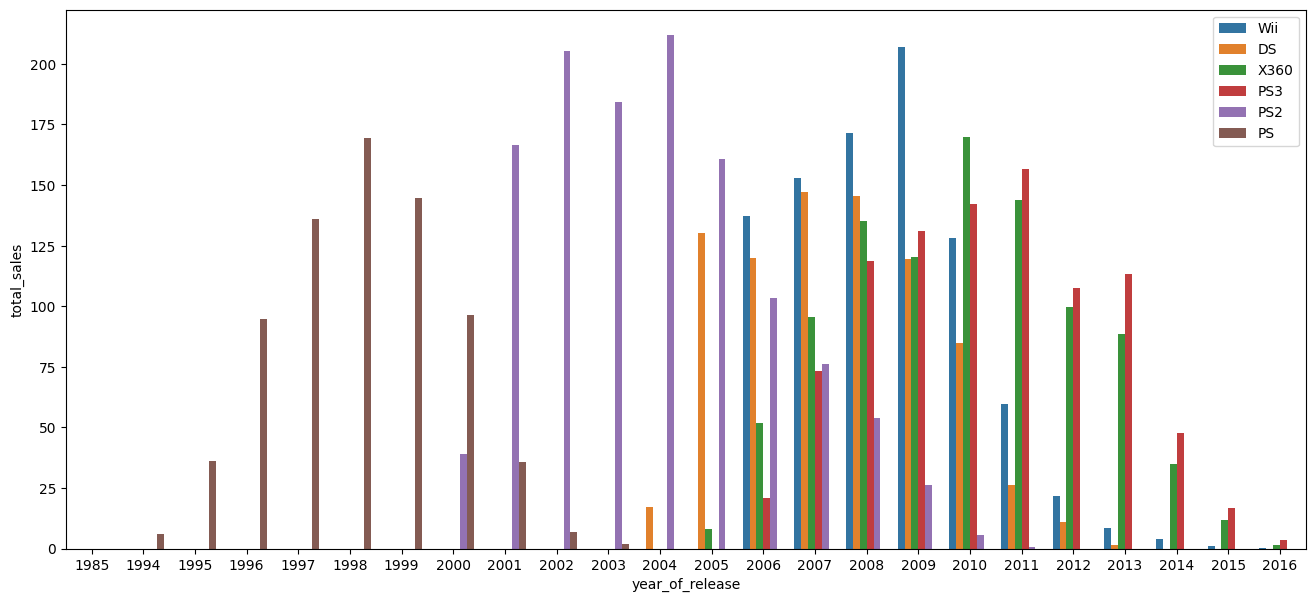

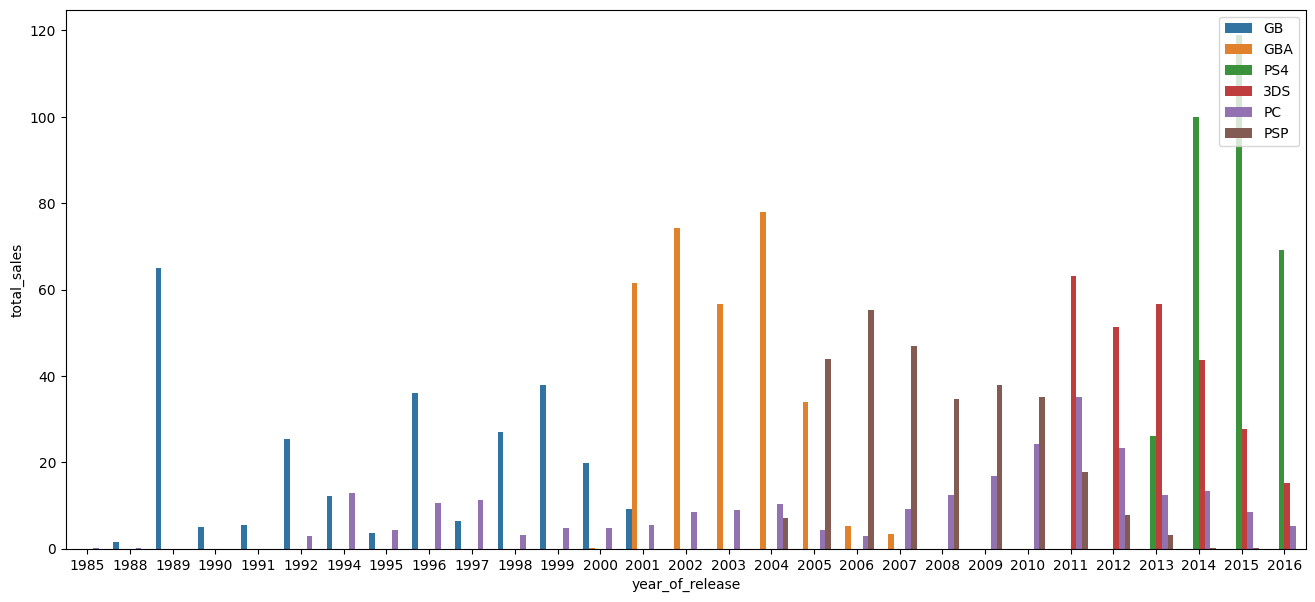

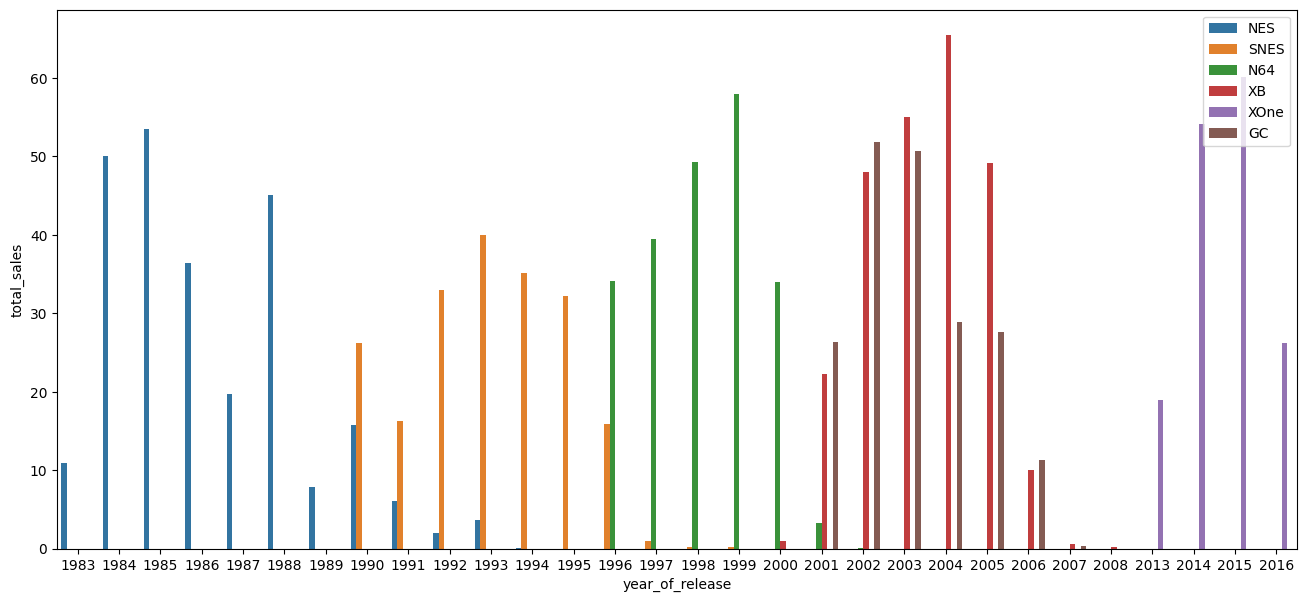

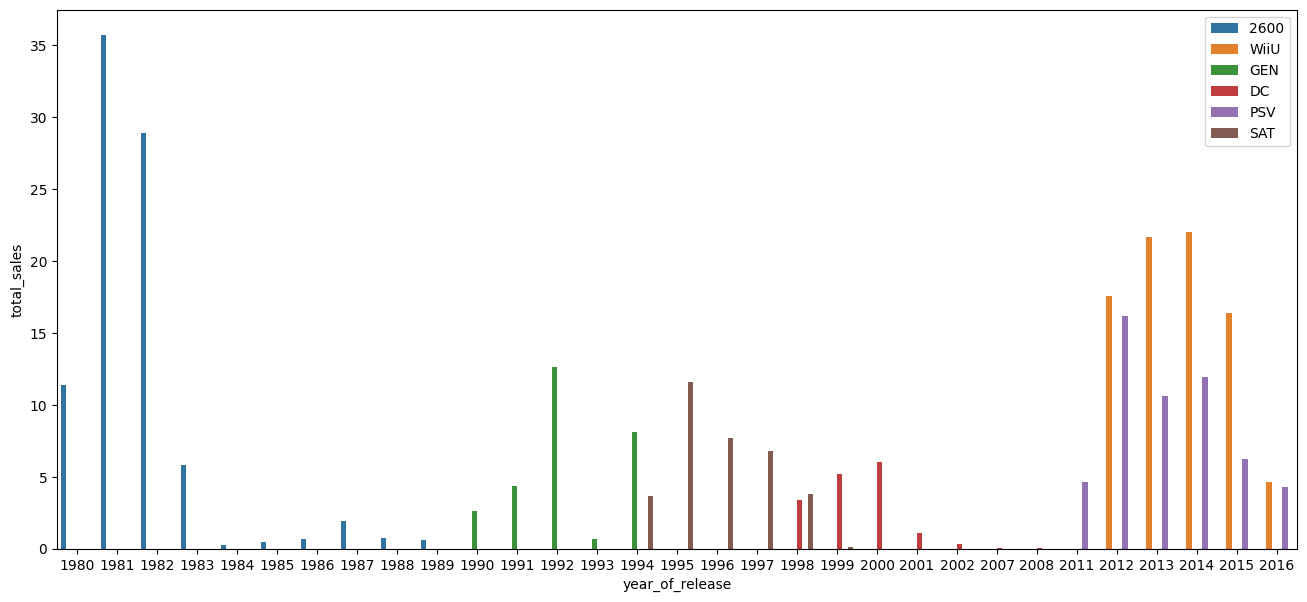

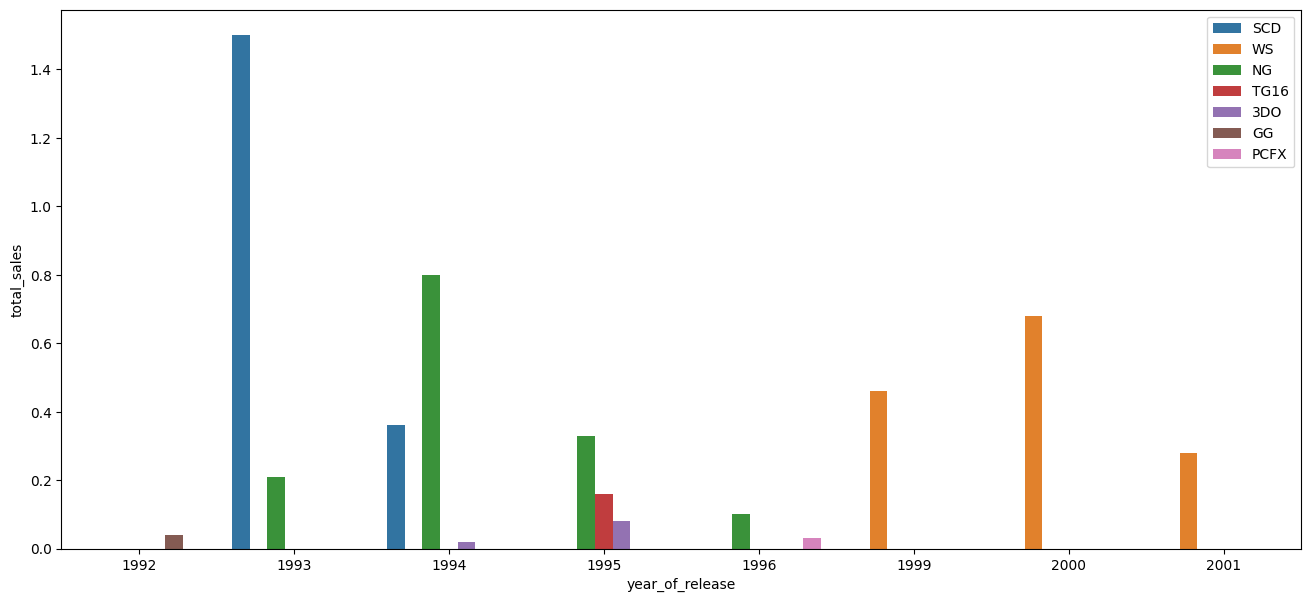

In [ ]:
platforms = [['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'],['PS4', 'GBA', 'PSP', '3DS', 'PC', 'GB'],['XB', 'NES', 'N64', 'SNES', 'GC', 'XOne'],
             ['DC', 'GEN', 'SAT', 'PSV', 'WiiU', '2600'], ['SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']]
for i in platforms: 
    fig = plt.figure(figsize=(16,7))
    sns.barplot(df_games[df_games.platform.isin(i)], x='year_of_release', y='total_sales', estimator='sum',hue='platform', errorbar=None)
    plt.legend(loc='upper right')
    plt.show()

De acuerdo a las gráficas se observa que:
- Las plataformas `GBA, GB, NES, SNES, 2600, WiiU y SCD` tenían más ventas al principio y luego de entre ``8 a 10 años`` en promedio dichas plataformas ya no consiguieron más ventas desapareciendo del mercado. Esto debido a que iban apareciendo otras plataformas que lograban el agrado del cliente.
- La nuevas plataformas aparecen en promedio cada  ``5 a 6 años`` logrando grandes cantidades de ventas y tienden a ``desaparecer en promedio alrededor de los 10 años``, algunas plataformas incluso en menos tiempo.

Se aprecia en las gráficas analizadas que si bien es cierto entre 2002 y 2011 hubo una gran cantidad de ventas, posterior a al 2011 las ventas fueron disminuyendo y los juegos que que lograban esas ventas iban desapareciendo. Del 2012 hacia adelante se encuentran en más apogeo las nuevas plataformas que han salido al mercado mientras que en el período del 2011 hacia atrás se encuentran las plataformas antiguas y algunas de ellas ya están en el último ciclo de su vida mientras que otras ya desaparecieron del mercado.

Por lo tanto los datos del 2011 hacia atrás no serían representativos de la actualidad, en ese sentido tomaremos el período de tiempo del ``2012 al 2016`` para continuar con nuestros análisis.

In [ ]:
#filtramos la tabla en una nueva variable que solo contenga dicho período de tiempo.
period = [2012, 2013, 2014, 2015, 2016]
df_games_filtered = df_games[df_games.year_of_release.isin(period)]
df_games_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int32  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 281.8+ KB


Como hemos filtrado nuestros datos para el período 2012 - 2016, la cantidad de registros han disminuido y con ello los nulos de las columnas `user_score y critic_score` también. Veamos entonces el porcentaje que representan estos nulos.

In [ ]:
print('Porcentaje de nulos en el campo USER_SCORE: ', round(100*df_games_filtered.user_score.isna().sum()/len(df_games),2),'%')
print('Porcentaje de nulos en el campo CRITIC_SCORE: ', round(100*df_games_filtered.critic_score.isna().sum()/len(df_games),2),'%')

Porcentaje de nulos en el campo USER_SCORE:  8.24 %
Porcentaje de nulos en el campo CRITIC_SCORE:  9.57 %


Hechemos un vistazo a la media y mediana de cada campo:

In [ ]:
print(f'Media USER_SCORE: {df_games_filtered.user_score.mean()}')
print(f'Mediana USER_SCORE: {df_games_filtered.user_score.median()}')
print(f'Media CRITIC_SCORE: {df_games_filtered.critic_score.mean()}')
print(f'Mediana CRITIC_SCORE: {df_games_filtered.critic_score.median()}')

Media USER_SCORE: 6.636120182887002
Mediana USER_SCORE: 7.0
Media CRITIC_SCORE: 72.25838414634147
Mediana CRITIC_SCORE: 74.0


Como la cantidad de nulos son elevados, entre el 8 y el 10%, no podemos eliminarlos. En este caso como los porcentajes de culos en ambas columnas son mucho más bajas que los porcentajes de no nulos, entonces podemos reemplazarlos por un estadístico, en esta ocasión los nulos serán reemplazados por los valores de la mediana de cada campo.

In [ ]:
df_games_filtered['user_score'] = df_games_filtered.user_score.fillna(df_games_filtered.user_score.median())
df_games_filtered['critic_score'] = df_games_filtered.critic_score.fillna(df_games_filtered.critic_score.median())
df_games_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int32  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     2886 non-null   float64
 9   user_score       2886 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 281.8+ KB


Como observamos ya no hay valores nulos en las columnas. Ahora podemos continuar con el análisis.

### 2.3 A continuación evaluaremos nuevamente que plataformas son líderes en ventas usando la nueva tabla creada.

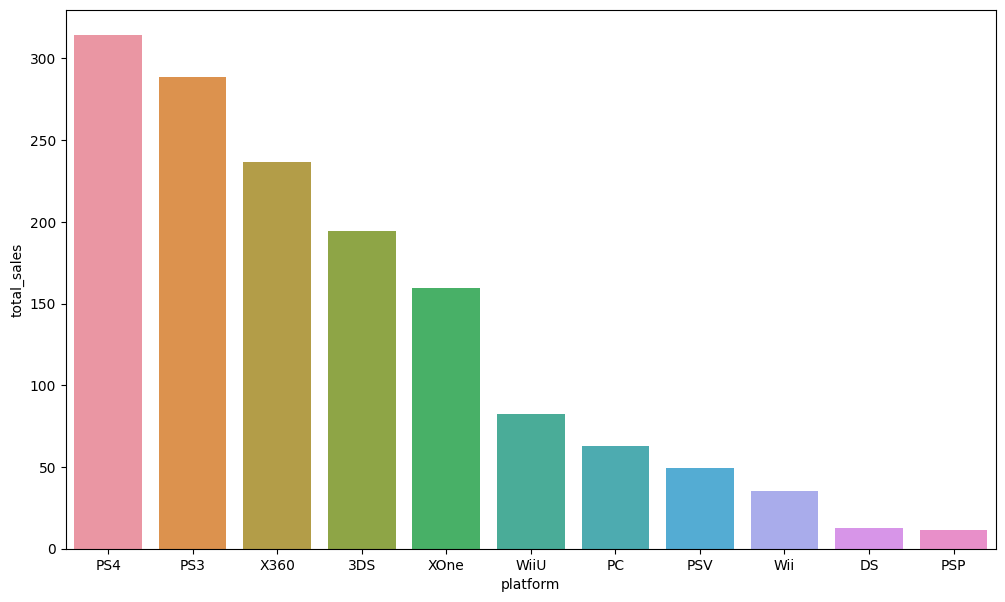

In [ ]:
#gráfica que muestra las ventas totales por plataforma durante el período 2012 - 2016
fig = plt.figure(figsize=(12,7))
sns.barplot(data=df_games_filtered, x='platform', y='total_sales', estimator='sum', errorbar=None, order=df_games_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index)
plt.show()
#en las versiones antiguas de seaborn estimator = np.sum

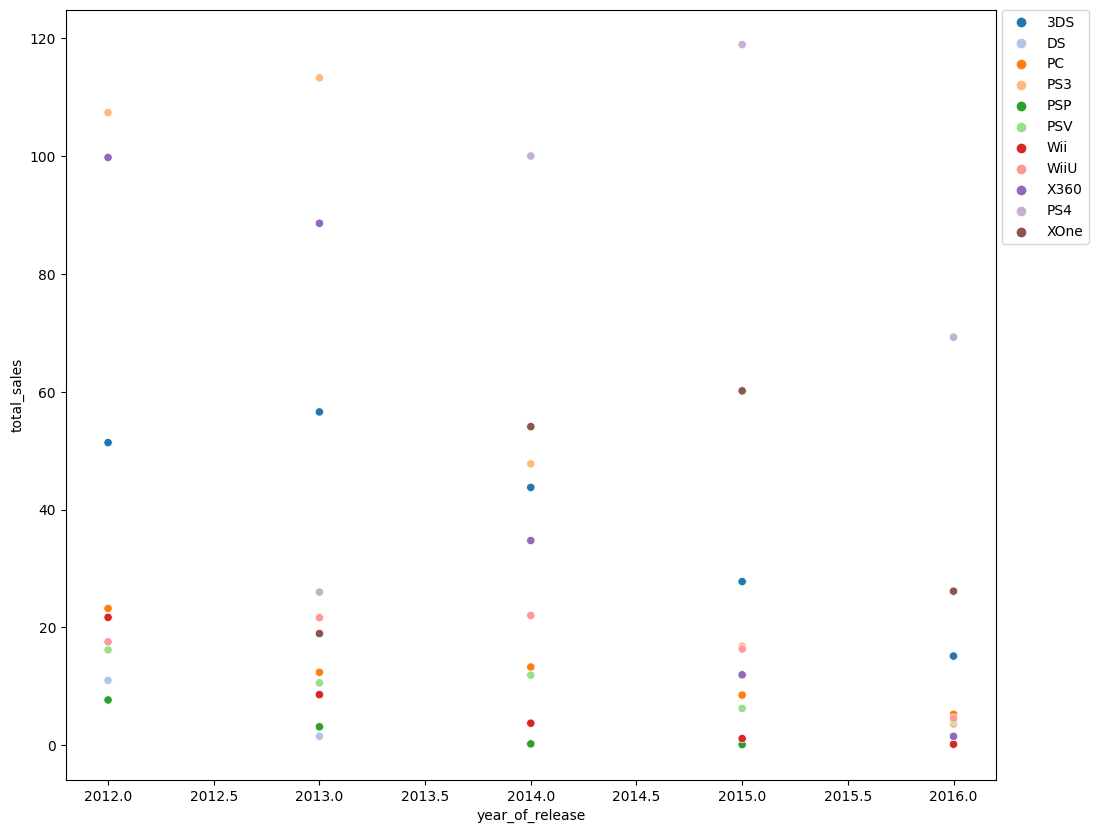

In [ ]:
#gráfica que muestra la evolución de las ventas totales de cada plataforma durante el período 2012 - 2016
fig = plt.figure(figsize=(12,10))
sns.scatterplot(df_games_filtered.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum').reset_index(), x='year_of_release', y='total_sales', hue='platform', palette='tab20')
plt.legend(bbox_to_anchor = (1.1, 1), loc = 'upper right', borderaxespad = 0)
plt.show()

In [ ]:
#observamos en el gráfico de dispersión que en el año 2016 las única plataformas que superaron los USD$15 millones fueron XOne, 3DS y PS4
df_games_filtered[df_games_filtered.year_of_release==2016].groupby('platform')['total_sales'].sum()

platform
3DS     15.14
PC       5.25
PS3      3.60
PS4     69.25
PSV      4.25
Wii      0.18
WiiU     4.60
X360     1.52
XOne    26.15
Name: total_sales, dtype: float64

- De la gráfica de barras observamos que las 05 plataformas con las mayores ventas totales en el período 2012-2016 son `PS4, PS3, X360, 3DS y XOne` en ese orden.
- Del gráfico de dispersión y de los gráficos de barras de más arriba arriba observamos respecto a las ventas a través del tiempo:
    - La plataforma `PS4` tiene una evolución desde el 2013 hasta el 2016 alcanzando sus mayores ventas en los años 2014 y 2015. En el 2016 las ventas han caído sin embargo ``han vendido más que las otras plataformas`` en este año, siendo sus ventas en 2016 de más de USD$69 millones.
     - La plataforma `PS3` tiene una evolución desde el 2006 hasta el 2016 alcanzando su máximo en el 2011 a partir del cual las ventas conmenzaron a disminuir alcanzando su mínimo en el 2016 con unas ventas de USD$3.60 millones
    - La plataforma `X360` tiene una evolución desde el 2005 hasta el 2016 alcanzando su máximo en el 2010 a partir del cual las ventas conmenzaron a disminuir alcanzando su mínimo en el 2016 con unas ventas de USD$1.52 millones.
    - La plataforma `3DS` tiene una evolución desde el 2011 hasta el 2016 alcanzando su máximo en el 2011 y en el 2013 a partir del cual las ventas conmenzaron a disminuir, sin embargo esta plataforma ``se ubica en tercer lugar en ventas``con más de USD15 millones en el año 2016, solo por detras de `PS4` y `XOne`.
    - La plataforma `XOne` tiene una evolución desde el 2013 hasta el 2016 alcanzando su máximo en los años 2014 y 2015 a partir del cual las ventas conmenzaron a disminuir, sin embargo esta plataforma ``se ubica en segundo lugar en ventas``con más de USD26 millones en el año 2016, solo por detras de `PS4`.

Como se nota en el gráfico de dispersión no se observa en ninguna plataforma una tendencia a la alza después del 2015. Todas las ventas muestran una caída hasta el 2016, sin embargo en el 2016 las plataformas `PS4, XOne y 3DS` se mantienen en el podio en ventas.
 
De acuerdo a lo mencionado las plataformas con mayor potencial de rentabilidad serían `PS4, XOne y 3DS`, esto porque dichas plataforma aún continúan en el 2016 habiendo registrado unas ventas superior a los 60 millones de dólares, a los USD$25 millones y a los USD$15 millones respectivamente.


### 2.4 Creamos un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

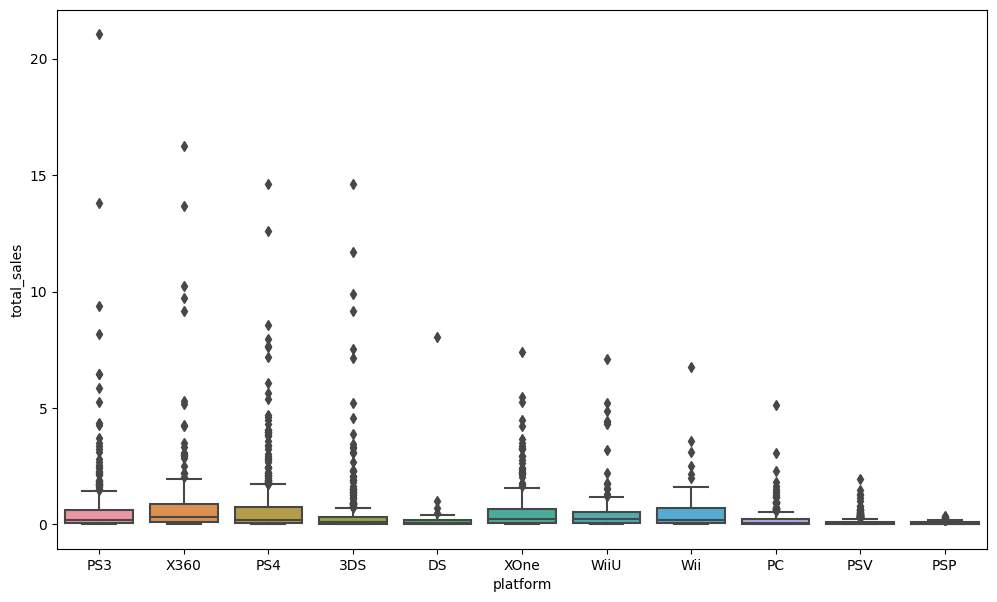

In [ ]:
fig = plt.figure(figsize=(12,7))
sns.boxplot(data=df_games_filtered, x='platform', y='total_sales')
plt.show()

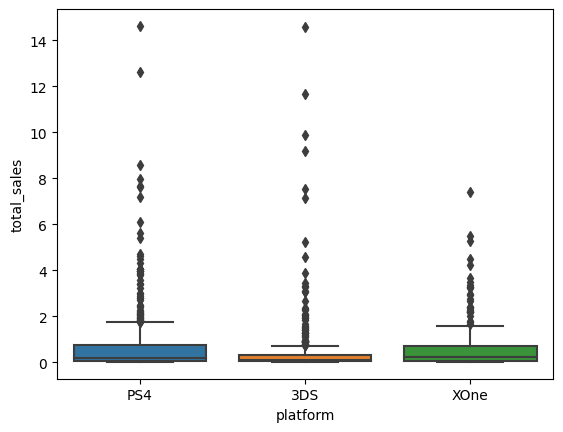

In [ ]:
#graficamos las 03 plataformas que tienen mayor potencial de rentabilidad
sns.boxplot(data=df_games_filtered[(df_games_filtered.platform=='PS4')|(df_games_filtered.platform=='XOne')|(df_games_filtered.platform=='3DS')], 
            x='platform', y='total_sales')
plt.show()

In [ ]:
#de la primera gráfica de caja, observamos que la plataforma PS3 es la úncia que ha recaudado más de USD$20 millones de la venta de un juego
#mostramos el juego que ha sido más vendido
df_games_filtered[(df_games_filtered.total_sales>=20)&(df_games_filtered.platform=='PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05


In [ ]:
#las plataformas PS4 y 3DS son las únicas que han recaudado más de USD$14 millones de la venta de un juego
#mostramos el juego que ha sido más vendido y el año
df_games_filtered[(df_games_filtered.total_sales>=14)&((df_games_filtered.platform=='PS4')|(df_games_filtered.platform=='3DS'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,T,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,14.60


De las gráficas observamos que:
- Todas las plataformas presentan valores atípicos, algunas muchos más que otros.
- Las diferencias en las ventas entre las plataformas son significativas, ello queda demostrado con la primera gráfica de caja. Hay ventas muy altas en comparación con las demás.
- El promedio de las ventas de cada plataforma es diferente, esto en vista de que cuentan con valores atípicos que hace variar al promedio.
- El 25% de las ventas en todos las plataformas se concentra por debajo de 0.5 millones de dólares.
- El primer cuartil en prácticamente todas las plataformas están muy próximo a la mediana, por lo que la mediana, es decir el 50% de las ventas, en casi todas las plataformas, está alrededor de 0.5 millones de dólares.
- El 75% de las ventas de las ytres plataformas con mayor potencial de rentabilidad se concentra por debajo de USD$1 millón.
- La plataforma `PS3` es la única plataforma que ha alcanzado ventas de un único juego por encima de los USD$20 millones
- De las tres plataformas con mayor rentabilidad, solo `PS4 y 3DS` han alcanzado ventas de un único juego por encima de los USD$14 millones.

### 2.5 Analizamos cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular
Elegiremos como plataforma a `PS4`, esto porque dicha plataforma fue la que más ventas obtuvo en el período 2012 - 2016.

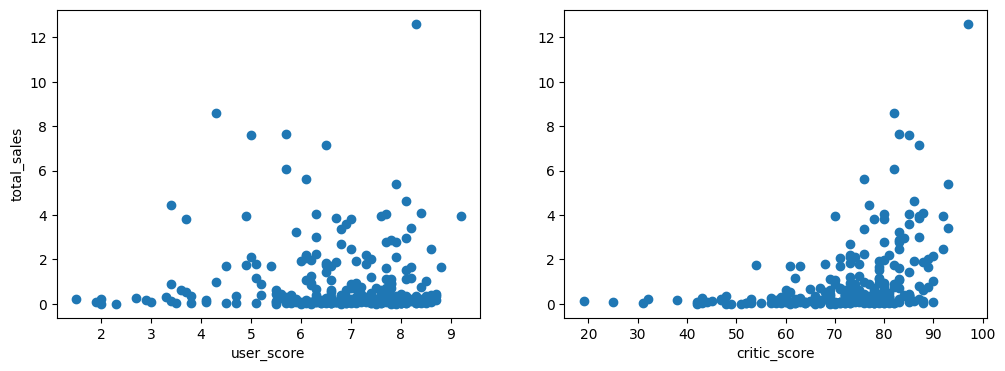

In [ ]:
#gráfico de dispersión de las reseñas de los usuarios (izquierda) y reseña de los profesionales (derecha) vs el total de ventas
df_games_ps4 = df_games_filtered[df_games_filtered.platform=='PS4']
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(x=df_games_ps4[['user_score']], y = df_games_ps4[['total_sales']])
ax[1].scatter(x=df_games_ps4[['critic_score']], y = df_games_ps4[['total_sales']])
ax[0].set_ylabel('total_sales')
ax[0].set_xlabel('user_score')
ax[1].set_xlabel('critic_score')
plt.show()

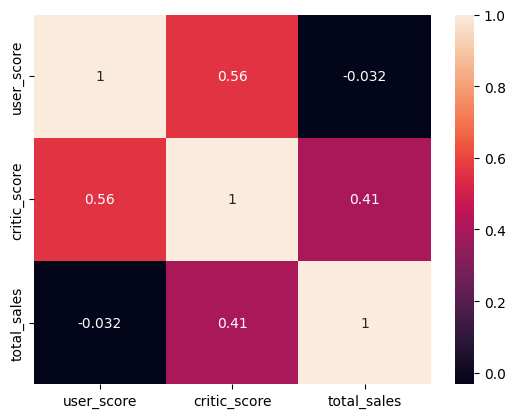

In [ ]:
sns.heatmap(df_games_ps4[['user_score', 'critic_score', 'total_sales']].corr(), annot=True)
plt.show()

De acuerdo a las gráficas observamos que:
- Las ventas, independientemente de la calificación del usuario o del profesional, se concentran por debajo de USD 4 millones principalmente.
- No existe una correlación lineal significativa entre la calificación de los usuarios y las ventas totales, esta correlación es de -0.032.
- Existe mayor correlación lineal entre la calificación de los profesionales y las ventas totales pero sigue sin ser muy significativa, esta correlación es de 0.41.
- De acuerdo a la calificación de los usuarios, las ventas tienden a superar ligeramente los USD 4 millones cuando la calificación es de 5 hacia arriba y algo curioso que ocurre es que cuando la calificación está entre 8 y 9 las ventas totales dieron un gran salto llegando hasta los más de USD$12 millones, pero este es un caso aislado.
- De acuerdo a la calificación de los profesionales (critic_users), las ventas tienden a superar los USD 5 millones cuando la calificación es más de 70 y algo curioso que ocurre es que cuando la calificación está entre 90 y 100 las ventas totales dieron un gran salto llegando hasta los más de USD 12 millones, pero este es un caso aislado.

A continuación mostramos otros gráficos observando la correlación solo para aquellas calificaciones de usuarios mayores a 5 y calificaciones de profesionales mayores a 70.

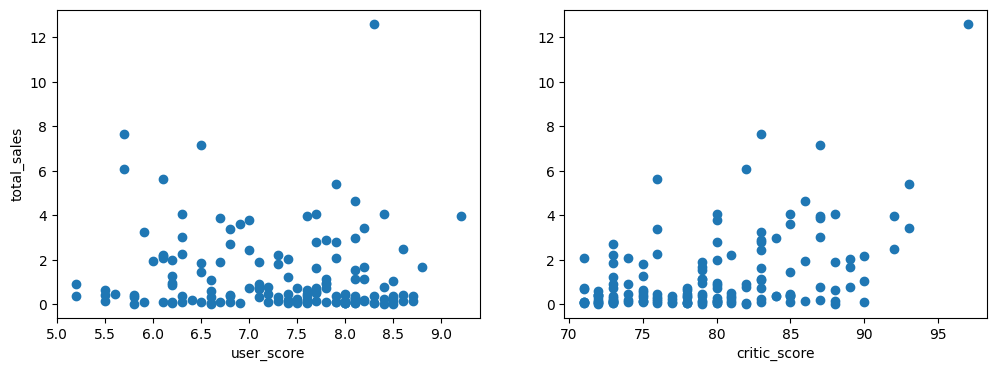

In [ ]:
#gráfico de dispersión de las reseñas de los usuarios (izquierda) y reseña de los profesionales (derecha) vs el total de ventas
df_games_ps4 = df_games_filtered[df_games_filtered.platform=='PS4']
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(x=df_games_ps4[(df_games_ps4.user_score>5) &(df_games_ps4.critic_score>70)][['user_score']], y = df_games_ps4[(df_games_ps4.user_score>5) &(df_games_ps4.critic_score>70)][['total_sales']])
ax[1].scatter(x=df_games_ps4[(df_games_ps4.user_score>5) &(df_games_ps4.critic_score>70)][['critic_score']], y = df_games_ps4[(df_games_ps4.user_score>5) &(df_games_ps4.critic_score>70)][['total_sales']])
ax[0].set_ylabel('total_sales')
ax[0].set_xlabel('user_score')
ax[1].set_xlabel('critic_score')
plt.show()

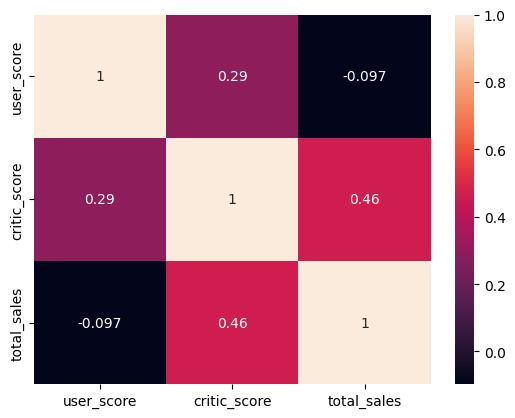

In [ ]:
sns.heatmap(df_games_ps4[(df_games_ps4.user_score>5) &(df_games_ps4.critic_score>70)][['user_score', 'critic_score', 'total_sales']].corr(), annot=True)
plt.show()

En conclusión no existe una fuerte correlación entre la calificación de los usuarios y profesionales vs el total de ventas, sin embargo observamos que para calificaciones profesionales mayores a 70 la correlación con las ventas es de 0.46 (aumentó lugeramente en relación a la correlación que incluía todas las calificaciones cuyo valor era 0.41 ) y para calificaciones mayores a 5 la correlación es de -0.097 (aunmento ligeramente en relación a la correlación que incluía todas las calificaciones cuyo valor era -0.032).

### 2.6 Compararemos las ventas de los mismos juegos de la plataforma PS4 en otras plataformas.
Las plataformas de comparación serán ``X360, PS3, XOne y 3DS`` ya que fueron las plataformas que más ventas tuvieron en el período 2012-2016.

In [ ]:
#extraemos solamente el nombre de los juegos y los convertimos en una lista y lo guardamos en una variable
juegos_ps4 = df_games_ps4.name.unique().tolist()

In [ ]:
#Creamos nuevas tablas para cada plataforma potencial que contengan solamente los juegos de PS4 
df_games_x360 = df_games_filtered[(df_games_filtered.name.isin(juegos_ps4))&(df_games_filtered.platform=='X360')]
df_games_PS3 = df_games_filtered[(df_games_filtered.name.isin(juegos_ps4))&(df_games_filtered.platform=='PS3')]
df_games_XOne = df_games_filtered[(df_games_filtered.name.isin(juegos_ps4))&(df_games_filtered.platform=='XOne')]
df_games_3DS = df_games_filtered[(df_games_filtered.name.isin(juegos_ps4))&(df_games_filtered.platform=='3DS')]

In [ ]:
#unimos las tablas para poder ver las ventas totales de los mismos juegos por plataforma
df_same_games = pd.concat([df_games_x360,df_games_PS3, df_games_XOne, df_games_3DS]) #por defecto axis=0 (unir por columnas) ; axis=1 (unir por filas)
df_same_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,74.0,7.0,T,9.18
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,74.0,4.9,M,4.28
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
9868,Skylanders: SuperChargers,3DS,2015,Action,0.05,0.06,0.00,0.01,74.0,7.0,E10+,0.12
11168,Terraria,3DS,2016,Action,0.00,0.04,0.05,0.00,71.0,7.1,T,0.09
11293,Adventure Time: Finn & Jake Investigations,3DS,2015,Action,0.03,0.05,0.00,0.01,74.0,7.0,T,0.09
12384,The Amazing Spider-Man 2 (2014),3DS,2014,Action,0.03,0.03,0.00,0.01,74.0,7.0,T,0.07


In [ ]:
#calculamos la catidad de juegos de cada plataforma que coinciden con los juegos de PS4
print('Plataforma X360: ',len(df_games_x360))
print('Plataforma PS3: ',len(df_games_PS3))
print('Plataforma XOne: ',len(df_games_XOne))
print('Plataforma 3DS: ',len(df_games_3DS))

Plataforma X360:  106
Plataforma PS3:  171
Plataforma XOne:  217
Plataforma 3DS:  19


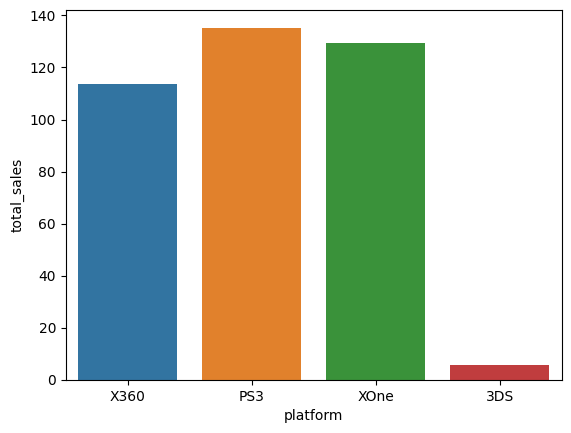

In [ ]:
#mostramos las ventas de los mismos juegos en las principales plataformas que han obtenido mas ingresos en los años 2012-2016
sns.barplot(data=df_same_games, x='platform', y='total_sales', errorbar=None, estimator='sum')
plt.show()

- Como vemos los mismos juegos obtienen más ventas en la plataforma `X360`, `PS3` y `XOne`.
- Era de esperarse que se obtengan más ventas en `X360`, `PS3` y `XOne` ya que dichas plataforma tiene más juegos de la plataforma PS4 respecto a la plataforma `3DS` que solo tiene 19 juegos en común con la plataforma `PS2`.

Esto indica que los juegos de la plataforma `PS4` son muy poco usados en la plataforma `3DS`.

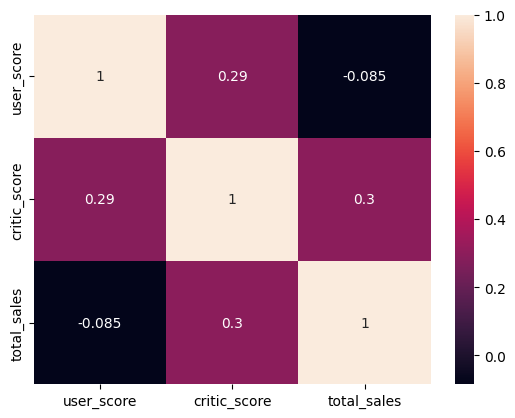

In [ ]:
sns.heatmap(df_same_games[['user_score', 'critic_score', 'total_sales']].corr(), annot=True)
plt.show()

Como se observa en el diagrama de correlación, tampoco existe correlación lineal significativa entre la calificación de los usuarios y profesionales con respecto a las ventas totales de los mismos juegos de la plataforma PS2 en las otras plataformas.

### 2.7 Analizamos la distribución general de los juegos por género.

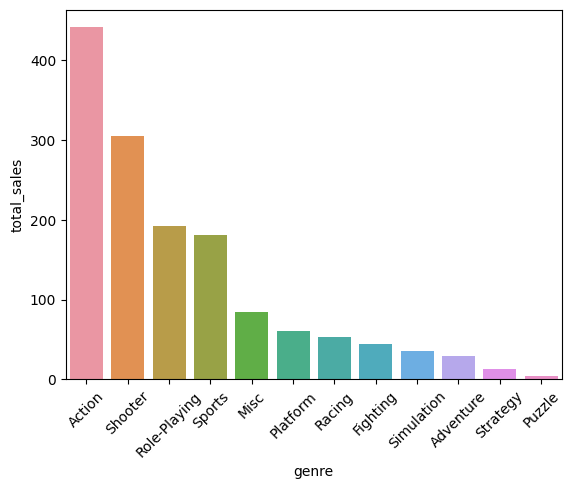

In [ ]:
sns.barplot(data=df_games_filtered, x='genre', y='total_sales', errorbar=None, estimator='sum', order=df_games_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.show()

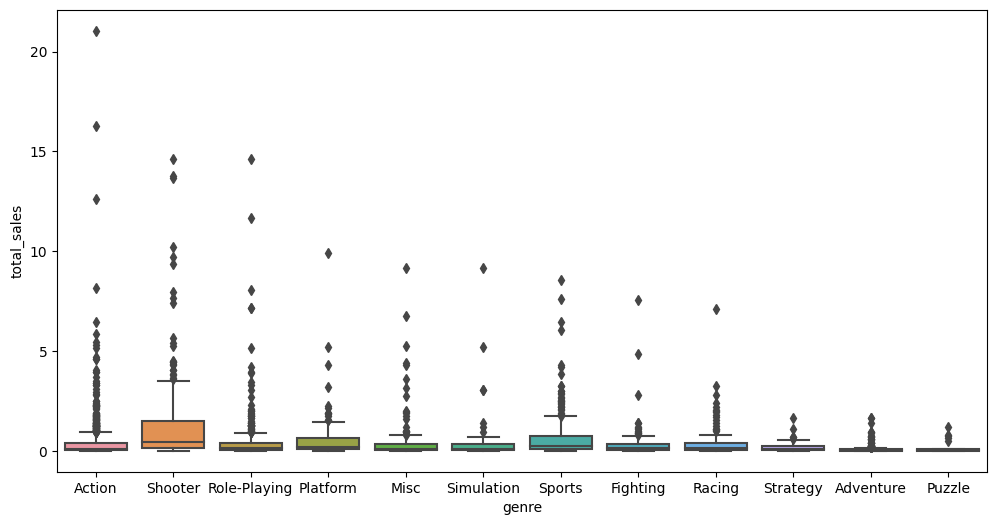

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(data=df_games_filtered, x='genre', y='total_sales')
plt.show()

De las gráficas observamos:
- Los géneros más rentables son `Action y Shooter` en ese orden, ambos por encima de USD 300 millones en ventas en el período 2012-2016, lo que indica que dichos juegos son preferidos por los usuarios y los que deberían ser tenidos en cuenta cuando se lancen nuevos juegos.
- Los otros dós géneros preferidos son `Role playing y Sports` en ese orden, ambos por encima de USD 170 millones en ventas en el período 2012-2016
- Los géneros con ventas más bajas son `Puzzle y Strategy`.
- Los géneros medianamente rentables son `Misc, Platform, Racing, Fighting y Adventure `.
- El gráfico de caja indica que existen muchos valores atípicos en las ventas por género.
- El 75% de las ventas del género `Shooter` se concentra por debajo de USD 1 millón mientras que en los dempas se concentra por debajo de USD 0.5 millones.
- Si bien el género `Sport` ocupa el cuarto lugar en ventas totales, este género ocupa el sétimo lugar en ventas anuales por detrás de `Platform, Misc y Simulation`.

## **3. Perfil de usuario de cada región**

### 3.1 Determinamos las 05 plataformas principales en las regiones NA, UE y JP y analizaremos como varían las cuotas de mercado de cada plataforma en las regiones

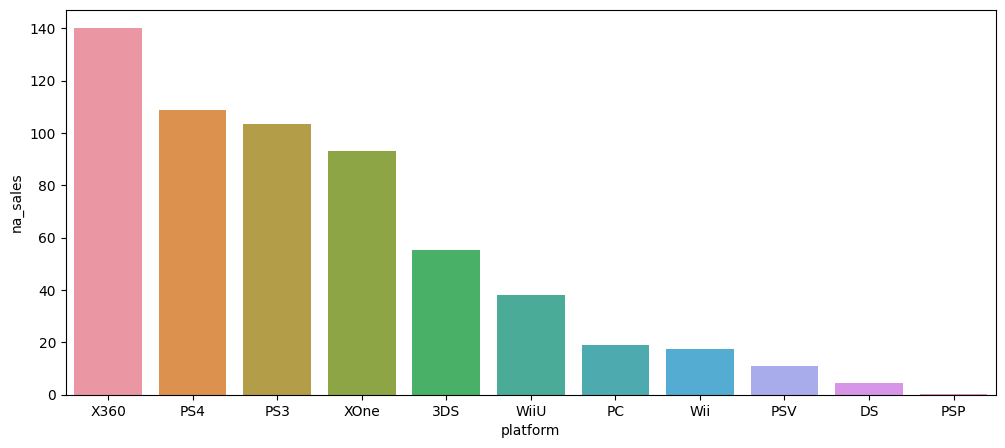

In [ ]:
#graficamos las ventas de cada plataforma en en la región NA para el período 2012-2016
fig = plt.figure(figsize=(12,5))
sns.barplot(data = df_games_filtered[['platform', 'na_sales']], x='platform', y='na_sales', estimator='sum',errorbar=None, order=df_games_filtered.groupby('platform')['na_sales'].sum().sort_values(ascending=False).index)
plt.show()

Observamos que en Norte América las 05 principales plataformas en orden de ventas son `X360, PS4, PS3, XOne y 3DS`, las 04 primeras con ventas por encima de los USD 90 millones y la plataforma `3DS` con ventas por encima de los USD 50 millones.

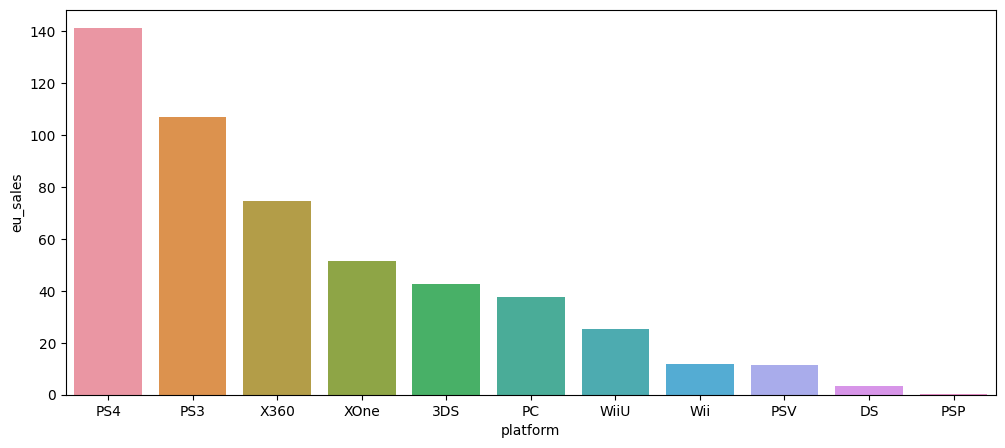

In [ ]:
#graficamos las ventas de cada plataforma en en la región EU período 2012-2016
fig = plt.figure(figsize=(12,5))
sns.barplot(data = df_games_filtered[['platform', 'eu_sales']], x='platform', y='eu_sales', estimator='sum',errorbar=None, order=df_games_filtered.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).index)
plt.show()

Observamos que en la Unión Europe las 05 principales plataformas en orden de ventas son `PS4, PS3, X360, XOne Y 3DS`, las dos primeras con ventas por encima de los USD 100 millones y las tres últimas con ventas superiores a USD 40 millones.

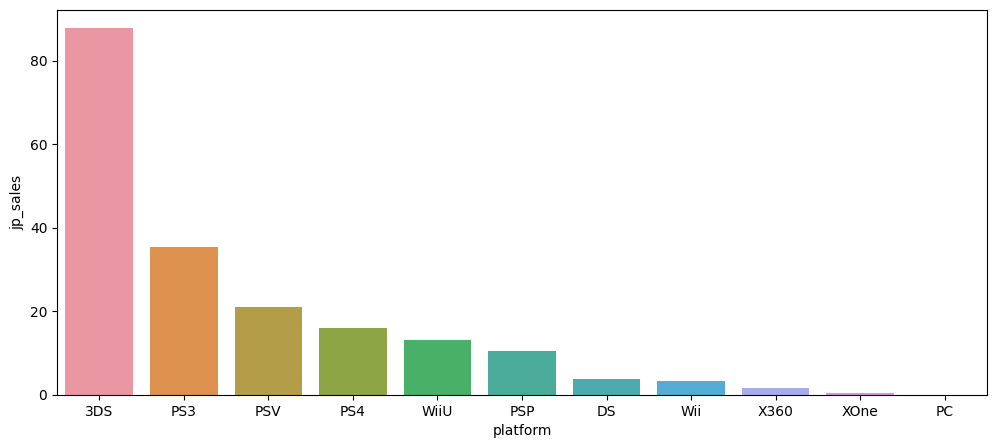

In [ ]:
#graficamos las ventas de cada plataforma en en la región JP período 2012-2016
fig = plt.figure(figsize=(12,5))
sns.barplot(data = df_games_filtered[['platform', 'jp_sales']], x='platform', y='jp_sales', estimator='sum',errorbar=None, order=df_games_filtered.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).index)
plt.show()

Observamos que en Japón las 05 principales plataformas en orden de ventas son `3DS, PS3, PSV, PS4 y WiiU`, siendo `3DS` la plataforma dominante en este país cuyas ventas superan los USD 80 millones. Las plataformas restantes no pasan de USD 40 millones en ventas.

Para poder visualizar mejor las cuotas de mercado de cada plataforma en las diferentes regiones, vamos a crear un dataframe que solo contenga estas plataformas con sus respectivas regiones y ventas.

In [ ]:
#NORTE AMERICA PERIODO 2012 - 2016
na_list_plt= ['X360', 'PS4', 'PS3', 'XOne', '3DS'] #principales plataformas
na_main_plat = df_games_filtered[df_games_filtered.platform.isin(na_list_plt)]
na_main_plat['regions'] = 'Nort America' #creamos nueva columna con el nombre de la región
na_main_plat.drop(columns=['eu_sales', 'jp_sales', 'other_sales', 'total_sales'], inplace=True) #eliminamos porque no sirven
na_main_plat.rename(columns={'na_sales':'sales'}, inplace=True) #renombramos columna

In [ ]:
#UNION EUROPEA PERIODO 2012 - 2016
eu_list_plt= ['PS4', 'PS3', 'X360', 'XOne', '3DS'] #principales plataformas
eu_main_plat = df_games_filtered[df_games_filtered.platform.isin(eu_list_plt)]
eu_main_plat['regions'] = 'Union Europea' #creamos nueva columna con el nombre de la región
eu_main_plat.drop(columns=['na_sales', 'jp_sales', 'other_sales', 'total_sales'], inplace=True) #eliminamos porque no sirven
eu_main_plat.rename(columns={'eu_sales':'sales'}, inplace=True) #renombramos columna

In [ ]:
#JAPON PERIODO 2012 - 2016
jp_list_plt= ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU'] #principales plataformas
jp_main_plat = df_games_filtered[df_games_filtered.platform.isin(jp_list_plt)]
jp_main_plat['regions'] = 'Japon' #creamos nueva columna con el nombre de la región
jp_main_plat.drop(columns=['na_sales', 'eu_sales', 'other_sales', 'total_sales'], inplace=True) #eliminamos porque no sirven
jp_main_plat.rename(columns={'jp_sales':'sales'}, inplace=True) #renombramos columna

In [ ]:
#UNIMOS TABLAS CREADAS CON CONCAT
main_plat_games = pd.concat([na_main_plat, eu_main_plat, jp_main_plat])


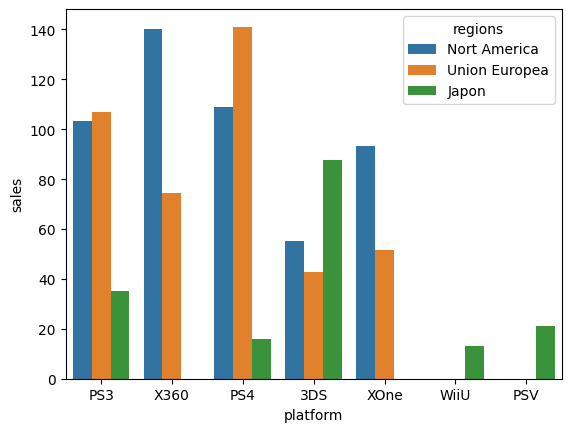

In [ ]:
sns.barplot(data=main_plat_games, x='platform', y='sales', hue='regions', estimator='sum', errorbar=None)
plt.show()

De acuerdo a la gráfica se observa:
- Solo las plataformas `3DS, PS3 y PS4` tienen cuota de mercado en las tres regiones.
- `PS4` tiene mayores ingresos en la Unión Europe, `3DS` en Japón y `PS3` tiene aproximadamente la misma cantidad de ingresos en Estados Unidos como en la Unión Europea.
- Las plataformas `WiiU y PSV` solo tienen cuota de mercado en Japon cuyos ingresos son alrededor de USD 20 millones.
- Las plataformas `XOne y X360` solo tienen cuota de mercado en Norte América y la Unión Europe, ambas plataformas obtienen mejores ingresos en el país del tío Sam.
- En general, las plataformas obtienen mejor rentabilidad de las ventas en Norte América seguido de las ventas en la Unión Europe y finalmente Japón.

### 3.2 Determinamos las 05 principales géneros de juegos en las regiones NA, UE y JP y analizaremos su comportamiento

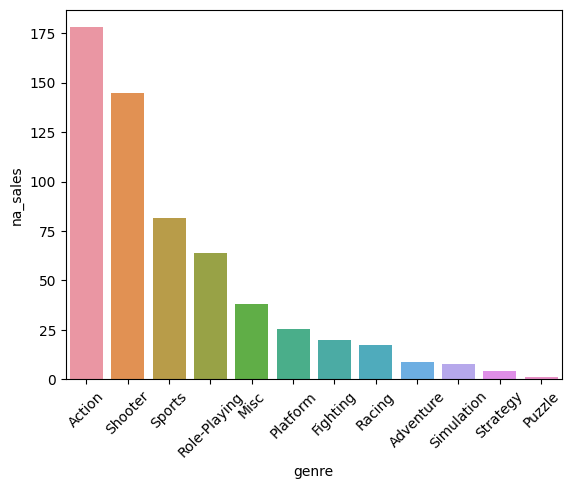

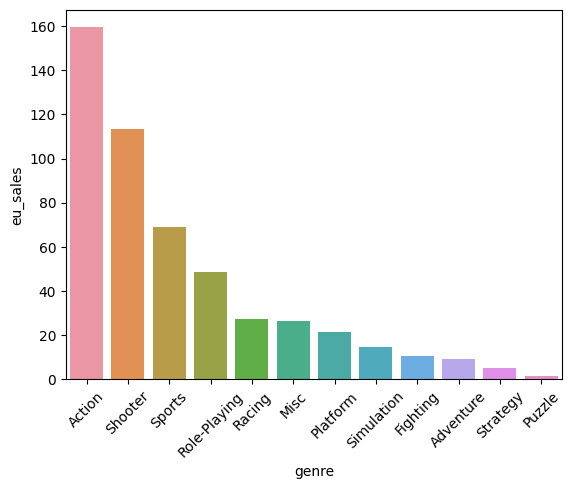

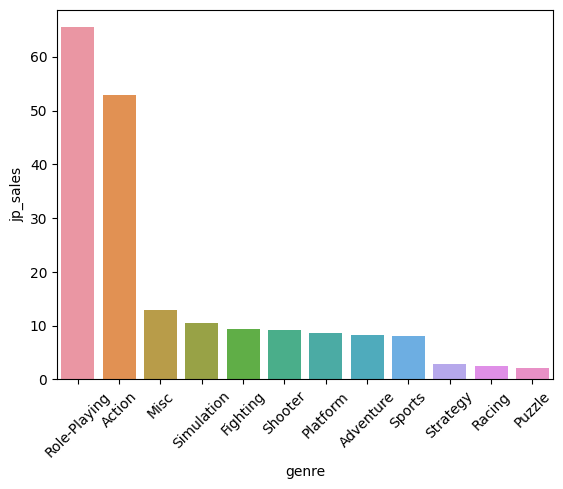

In [ ]:
#graficamos las ventas por género en cada región período 2012-2016
reg = ['na_sales', 'eu_sales', 'jp_sales']
for i in reg:
    sns.barplot(data=df_games_filtered[['genre', i]], x='genre', y= i, errorbar=None, estimator='sum', order=df_games_filtered.groupby('genre')[i].sum().sort_values(ascending=False).index)
    plt.xticks(rotation=45)
    plt.show()

De las gráficas observamos:
- En Norte América los 05 principales géneros en orden de ventas son `Action, Shooter, Sports, Role_playing y Misc`. De estos `Action y Shooter` son los más rentables con ventas de más de USD 130 millones.
- En la Unión Europea los 05 principales géneros en orden de ventas son `Action, Shooter, Sports, Role_playing y Racing`. De estos `Action y Shooter` son los más rentables con ventas de más de USD 110 millones.
- En Japón los 05 principales géneros en orden de ventas son `Role_playing, Action, Misc, Simulation y Fighting`. De estos `Role_playing y Action` son los más rentables con ventas de más de USD 500 millones. Los demás generos apenas alcanzan los USD 10 millones.

Al igual que en las ventas por plataforma, los principales ingresos por género se encuentran en Nort América seguido de la Unión Europea y Japón. 
- Tanto en Norte América como en la Unión Europea coinciden en los 05 géneros más consumidos a excepción de `Misc` que solo es comprado en Norte América y `Racing` que es comprado solo en la Unión Europea.
- En Japón el principal género es el `Role_playing` a diferencia de las otras regiones que es el género `Action`.
- En las tres regiones se consumen los géneros `Action y Role_playing`.

### 3.3 Analizamos si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

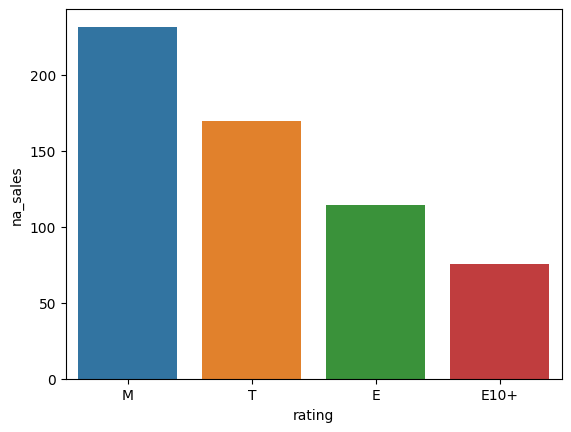

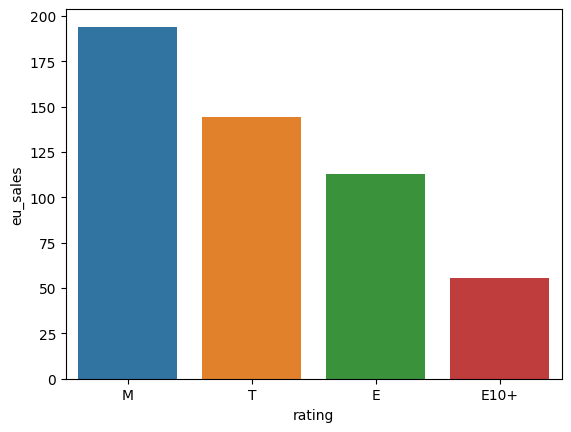

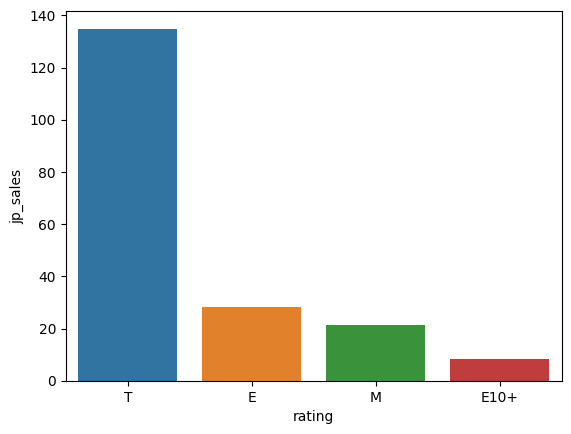

In [ ]:
#mostramos el total de ventas en cada región de acuerdo a la clasificación ESRB período 2012 - 2016
reg = ['na_sales', 'eu_sales', 'jp_sales']
for i in reg:
    sns.barplot(data=df_games_filtered, x='rating', y=i, errorbar=None, estimator='sum', order=df_games_filtered.groupby('rating')[i].sum().sort_values(ascending=False).index)
    plt.show()

Observamos que definitivamente la clasificación del juego afecta a las ventas en cada región.
-  En Norte América y la Unión Europea los juegos con clasificación `M (para mayores de 17 años)` tienen más ventas, seguidos de la clasificaicón `T (para mayores de 13 años)`, seguidos de `E (para todos)` y de `E10+ (mayores de 10 años)`.
- En Japón los juegos con clasificación `T` son los que tienen más ventas, seguidos de la clasificaicón `E`, seguidos de `M` y de `E10+`. La clasificación `T` es la que abrumadoramente tiene más cuota de mercado en Japón a comparación de las otras clasificaciones.
- Se observa también que, como sucedió con los 05 géneros principales y las 05 plataformas principales, el país del dólar es el que más consume estos juegos.

## **4. Prueba de hipótesis**
Probaremos las siguientes hipótesis:
1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Recordemos que nuestro período de análisis es 2012-2016. 

Antes de aplicar t-test para comprobar las hipótesis, vamos a determinar:
1. Si las distribuciones de las muestras son normales
2. Si la varianza de las muestras son iguales o no

Una vez hechas estas verificaciones pasaremos a:  
 
 3. Definir las hipótesis nula y alternativa  
 4. Comprobar las hipótesis planteadas

### **4.1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales**

#### **4.1.1 Verificamos si las distribuciones de las muestras son  normales**

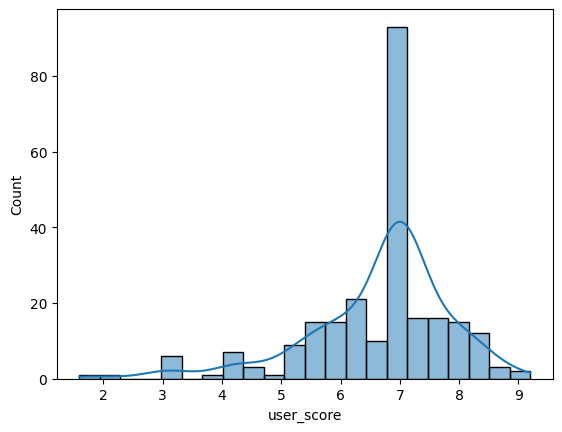

In [ ]:
#MUESTRA CORRESPONDIENTE A LA CALIFIFICACIÓN DE LOS USUARIOS DE LA PLATAFORMA XONE
sns.histplot(data=df_games_filtered[df_games_filtered.platform=='XOne'], x='user_score', kde=True)
plt.show()

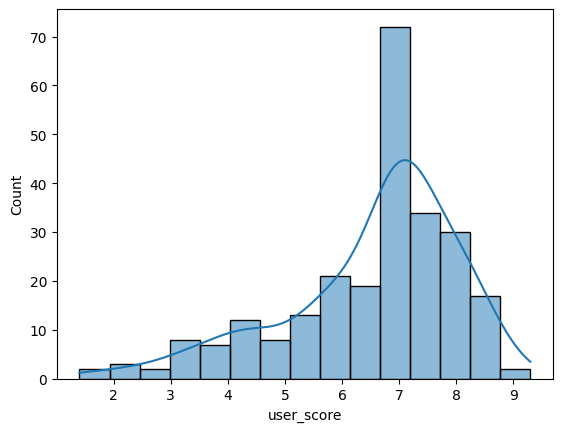

In [ ]:
#MUESTRA CORRESPONDIENTE A LA CALIFIFICACIÓN DE LOS USUARIOS DE LA PLATAFORMA PC
sns.histplot(data=df_games_filtered[df_games_filtered.platform=='PC'], x='user_score', kde=True)
plt.show()

Observamos que ambas distribuciones no son normales sin embargo podemos decir que son simétricas de cola moderada. Tienen un sesgo a la derecha ya que la mayor cantidad de calificaciones se concentran en esta parte de la gráfica.

#### **4.1.2 Verificamos si las varianzas de las muestras son  iguales o no**

Para comprobar si las varianzas de dos o más muestras son iguales usamos la prueba de Levene, entonces definimos las hipótesis respecto a la varianza:
 - H0: La varianza de las calificaciones de los usuarios de las plataformas Xbox One y PC son iguales.
 - H1: La varianza de las calificaciones de los usuarios de las plataformas Xbox One y PC son diferentes.

Como vimos en los histogramas, estos no son totalmente normales sino más bien con una simetría moderada. Para este caso estableceremos el hiperparámetro `center` del test de Lavane como la `media`.

In [ ]:
#creamos dos variables para nuestras dos muestras:
xone_platform = df_games_filtered[df_games_filtered.platform=='XOne']['user_score'] #calificación de los usuarios de la plataforma Xbox One
pc_platform = df_games_filtered[df_games_filtered.platform=='PC']['user_score']  #calificación de los usuarios de la plataforma PC

#en el test de lavane por defecto el nivel de confianza es 95% y center=median
_, pvalue = levene(xone_platform, pc_platform, center='mean', proportiontocut=0.05)
print('p-value: ', pvalue)

if pvalue < 0.05: #nivel de confianza del 95%
   print('Rechazamos la hipótesis nula')
else:
   print('No rechazamos la hipótesis nula')

p-value:  0.00013414616572129365
Rechazamos la hipótesis nula


Como el p-value es menor a 0.05 se rechaza la hipótesis nula, esto indica que las varianzas de las calificaciones de los usuarios de la plataforma XOne y PC son diferentes.

Y como se observa en el código de abajo, las varianzas de ambas muestras son diferentes entre si.

In [ ]:
print('Varianza calificaciones XOne: ',df_games_filtered[df_games_filtered.platform=='XOne']['user_score'].var())
print('Varianza calificaciones PC: ',df_games_filtered[df_games_filtered.platform=='PC']['user_score'].var())

Varianza calificaciones XOne:  1.4477064612751391
Varianza calificaciones PC:  2.328421044176707


#### **4.1.3 Definimos la hipótesis nula y alternativa**
- H0: La calificación promedio de los usuarios de las plataformas Xbox One y PC son iguales. (hipótesis nula)
- H1: La calificación promedio de los usuarios de las plataformas Xbox One y PC son diferentes. (hipótesis alternativa)

#### **4.1.4 Comprobamos las hipótesis**

In [ ]:
#creamos dos variables para nuestras dos muestras:
xone_platform = df_games_filtered[df_games_filtered.platform=='XOne']['user_score'] #calificación de los usuarios de la plataforma Xbox One
pc_platform = df_games_filtered[df_games_filtered.platform=='PC']['user_score']  #calificación de los usuarios de la plataforma PC

#nivel de confianza del 95%
alpha = 0.05

#obtenemos el valor del p-value
_, pvalue = st.ttest_ind(xone_platform, pc_platform, alternative='two-sided', equal_var=False) #equal_var = False porque las varianzas son diferentes

print(f'p-value: {pvalue}') #mostramos dicho valor

if pvalue < alpha:
   print('Rechazamos la hipótesis nula')
else:
   print('No rechazamos la hipótesis nula')

p-value: 0.33791572567327677
No rechazamos la hipótesis nula


La hipótesis nula no es rechazada. Por lo tanto esto indica que no existe evidencia suficiente para determinar que la calificación promedio de los usuarios para las plataformas XOne y PC son diferentes. Esto se confirma con el código de abajo donde los promedios de calificación en ambos plataformas son casi lo mismo.

De esta manera queda confirmado que  *``No es posible determinar que la calificación promedio de los usuarios de las plataformas Xbox One y PC son diferentes.``*

In [ ]:
print('Calificación promedio Plataforma Xbox One: ', df_games_filtered[df_games_filtered.platform=='XOne']['user_score'].mean())
print('Calificación promedio Plataforma PC: ', df_games_filtered[df_games_filtered.platform=='PC']['user_score'].mean())

Calificación promedio Plataforma Xbox One:  6.647368421052632
Calificación promedio Plataforma PC:  6.5291999999999994


### **4.2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes**

#### **4.2.1 Verificamos si las distribuciones de las muestras son normales**

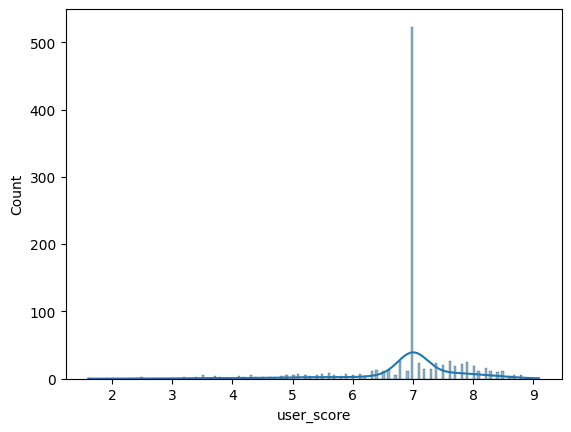

In [ ]:
#MUESTRA CORRESPONDIENTE A LA CALIFIFICACIÓN DE LOS USUARIOS PARA EL GÉNERO ACCIÓN
sns.histplot(data=df_games_filtered[df_games_filtered.genre=='Action'], x='user_score', kde=True)
plt.show()

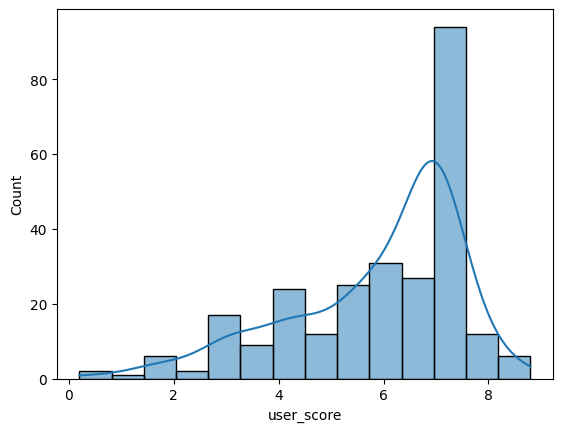

In [ ]:
#MUESTRA CORRESPONDIENTE A LA CALIFIFICACIÓN DE LOS USUARIOS PARA EL GÉNERO SPORTS
sns.histplot(data=df_games_filtered[df_games_filtered.genre=='Sports'], x='user_score', kde=True)
plt.show()

Observamos que ambas distribuciones no son normales sin embargo podemos decir que son simétricas de cola moderada. Tienen un sesgo a la derecha ya que la mayor cantidad de calificaciones se concentran en esta parte de la gráfica.

Observamos también, como quedó demostrado en los análisis previos, que el género acción es más común que el género sports, es por ello que la cantidad de calificaciones tienen una frecuencia mayor que sports.

#### **4.2.2 Verificamos si las varianzas de las muestras son  iguales o no**

Definimos las hipótesis respecto a la varianza:
 - H0: La varianza de las calificaciones de los usuarios para los géneros Acción y Sports son iguales.
 - H1: La varianza de las calificaciones de los usuarios para los géneros Acción y Sports son diferentes.

Como vimos en los histogramas, estos no son totalmente normales sino más bien con una simetría moderada. Para este caso estableceremos el hiperparámetro `center` del test de Lavane como la `media`.

In [ ]:
#creamos dos variables para nuestras dos muestras:
action_genre = df_games_filtered[df_games_filtered.genre=='Action']['user_score'] #calificación de los usuarios para el género Acción
sport_genre = df_games_filtered[df_games_filtered.genre=='Sports']['user_score']  #calificación de los usuarios para el género Deportes

#en el test de lavane por defecto el nivel de confianza es 95% y center = median
_, pvalue = levene(action_genre, sport_genre, center='mean') #proportiontocut=0.05 por defecto
print('p-value: ', pvalue)

if pvalue < 0.05: #nivel de confianza
   print('Rechazamos la hipótesis nula')
else:
   print('No rechazamos la hipótesis nula')

p-value:  1.0053975032821658e-36
Rechazamos la hipótesis nula


Como el p-value es menor a 0.05 se rechaza la hipótesis nula, esto indica que las varianzas de las calificaciones de los usuarios para los géneros Action y Sports son diferentes.

Y como se observa en el código de abajo, las varianzas de ambas muestras son muy diferentes entre si.

In [ ]:
print('Varianza calificaciones género Action: ',df_games_filtered[df_games_filtered.genre=='Action']['user_score'].var())
print('Varianza calificaciones género Sports: ',df_games_filtered[df_games_filtered.genre=='Sports']['user_score'].var())

Varianza calificaciones género Action:  0.9650383358601791
Varianza calificaciones género Sports:  2.6707187377718147


#### **4.2.3 Definimos la hipótesis nula y alternativa**
- H0: La calificación promedio de los usuarios para los géneros Acción y Deportes no son diferentes. (hipótesis nula)
- H1: La calificación promedio de los usuarios para los géneros Acción y Deportes son diferentes. (hipótesis alternativa)

#### **4.2.4 Comprobamos las hipótesis**

In [ ]:
#creamos dos variables para nuestras dos muestras:
action_genre = df_games_filtered[df_games_filtered.genre=='Action']['user_score'] #calificación de los usuarios para el género Acción
sport_genre = df_games_filtered[df_games_filtered.genre=='Sports']['user_score']  #calificación de los usuarios para el género Deportes

#nivel de confianza del 95%
alpha = 0.05

#obtenemos el valor del p-value
_, pvalue = st.ttest_ind(action_genre, sport_genre, alternative='two-sided', equal_var=False) #varianzas diferentes equal_var = False

print(f'p-value: {pvalue}') #mostramos dicho valor

if pvalue < alpha:
   print('Rechazamos la hipótesis nula')
else:
   print('No rechazamos la hipótesis nula')

p-value: 2.3313063772680757e-20
Rechazamos la hipótesis nula


La hipótesis nula es rechazada por lo tanto se confirma que la calificación promedio de los usuarios para los géneros Action y Sports son diferentes. Esto es cierto ya que como se observa en el código de abajo, la calificación promedio del género Action es 6.91 y del género Sports es 5.88.

De esta manera queda confirmado de que *``la calificación promedio de los usuarios para los géneros Action y Sports son diferentes.``*

In [ ]:
print(df_games_filtered[df_games_filtered.genre=='Action']['user_score'].mean())
print(df_games_filtered[df_games_filtered.genre=='Sports']['user_score'].mean())

6.911251212415131
5.876492537313434


## **CONCLUSIONES**
- Las 06 plataformas que mayores ventas tuvieron en el período 1980-2016 son `PS2, X360, PS3, Wii, DS, PS`
- Es más común los ingresos entre 0 a 20 millones de dólares, seguido de entre 120 a 140 millones de dólares, seguido de 20 a 40 millones de dólares y de 80 a 120 millones de dólares en el período 1980-2016.
- Entre el ``período de tiempo 2002 - 2016`` existen más ingresos por ventas, además en este período es en donde se vendieron la mayor cantidad de juegos. 
- Conforme pasa el tiempo, las plataformas antiguas van desapareciendo del mercado y van apareciendo nuevas plataformas.
- Los juegos de plataformas antiguas van quedando obsoletas mientras nuevas plataformas van apareciendo. Estas nuevas plataformas cada vez usan menos los juegos de plataformas antiguas.
- Las plataformas tienden a ``desaparecer del mercado entre 8 a 10 años`` y las nuevas plataformas ``aparecen alrededor de cada 5 a 6 años.``
- Para poder acercarnos a un pronóstico adecuado de ventas y estrategias para el año 2017, se eligió el ``período 2012 - 2016 para el análisis``, esto en vista de que las nuevas plataformas aparecieron alrededor del 2012  y cuyo ciclo de vida no acaba en el 2016, por lo que este período es el más representativo de la actualidad.

Período 2012 - 2016:
- Las 05 plataformas que mayores ventas tuvieron son `PS4, PS3, 'X360, 3DS y XOne`.
- Las plataformas con mayor potencial de rentabilidad son `PS4, XOne y 3DS`, esto porque dichas plataforma aún continúan en el 2016 habiendo registrado unas ventas superior a los 60 millones de dólares, a los USD 25 millones y a los USD 15 millones respectivamente.
- No existe una correlación lineal positiva entre la calificación de los usuarios y profesionales respecto a las ventas de las plataformas.
- La plataforma `PS3` es la única plataforma que ha alcanzado ventas de un único juego por encima de los USD 20 millones.
- De las tres plataformas con mayor rentabilidad, solo `PS4 y 3DS` han alcanzado ventas de un único juego por encima de los USD 14 millones.
- El ``promedio de las ventas de cada plataforma es diferente,`` esto en vista de que cuentan con valores atípicos que hace variar al promedio.
- El ``25% de las ventas`` en todos las plataformas se concentra por debajo de 0.5 millones de dólares.
- El primer cuartil en prácticamente todas las plataformas están muy próximo a la mediana, por lo que la mediana, es decir ``el 50% de las ventas, en casi todas las plataformas, está alrededor de 0.5 millones de dólares``.
- El ``75% de las ventas de las tres plataformas con mayor potencial de rentabilidad`` se concentra por ``debajo de USD 1 millón``.
- Los juegos de la plataforma `PS4` son muy poco usados en la plataforma `3DS`.
- Los géneros más rentables son `Action y Shooter` en ese orden, ambos por encima de USD 300 millones en ventas, lo que indica que dichos juegos son preferidos por los usuarios y los que deberían ser tenidos en cuenta cuando se lancen nuevos juegos.
- Los otros dós géneros preferidos son `Role playing y Sports` en ese orden, ambos por encima de USD 170 millones en ventas.
- Los géneros con ventas más bajas son `Puzzle y Strategy`.
- Los géneros medianamente rentables son `Misc, Platform, Racing, Fighting y Adventure `.
- El 75% de las ventas del género `Shooter` se concentra por debajo de USD 1 millón mientras que las ventas de los demás géneros se concentra por debajo de USD 0.5 millones.
- En Norte América las 05 principales plataformas en orden de ventas son `X360, PS4, PS3, XOne y 3DS`, las 04 primeras con ventas por encima de los USD 90 millones y la plataforma `3DS` con ventas por encima de los USD 50 millones.
- En la Unión Europea las 05 principales plataformas en orden de ventas son `PS4, PS3, X360, XOne Y 3DS`, las dos primeras con ventas por encima de los USD 100 millones y las tres últimas con ventas superiores a USD 40 millones.
- En Japón las 05 principales plataformas en orden de ventas son `3DS, PS3, PSV, PS4 y WiiU`, siendo `3DS` la plataforma dominante en este país cuyas ventas superan los USD 80 millones. Las plataformas restantes no pasan de USD 40 millones en ventas.
- Solo las plataformas `3DS, PS3 y PS4` tienen cuota de mercado en Norte América, la Unión Europea y Japon; obteniendose mayores ingresos de las ventas en Norte America seguido de la Unión Europea.
- `PS4` tiene mayores ingresos en la Unión Europea, `3DS` en Japón y `PS3` tiene aproximadamente la misma cantidad de ingresos en Estados Unidos como en la Unión Europea.
- Las plataformas `WiiU y PSV` solo tienen cuota de mercado en Japón cuyos ingresos son alrededor de USD 20 millones.
- Las plataformas `XOne y X360` solo tienen cuota de mercado en Norte América y la Unión Europe, ambas plataformas obtienen mejores ingresos en el país del tío Sam.
- En general, las plataformas obtienen`` mejor rentabilidad de las ventas en Nort América seguido de las ventas en la Unión Europe y finalmente Japón``.
- En Norte América los 05 principales géneros en orden de ventas son `Action, Shooter, Sports, Role_playing y Misc`. De estos `Action y Shooter` son los más rentables con ventas de más de USD 130 millones.
- En la Unión Europea los 05 principales géneros en orden de ventas son `Action, Shooter, Sports, Role_playing y Racing`. De estos `Action y Shooter` son los más rentables con ventas de más de USD 110 millones.
- En Japón los 05 principales géneros en orden de ventas son `Role_playing, Action, Misc, Simulation y Fighting`. De estos `Role_playing y Action` son los más rentables con ventas de más de USD 500 millones. Los demás generos apenas alcanzan los USD 10 millones.
- Los principales ingresos por género se encuentran en ``Norte América seguido de la Unión Europea y Japón``. 
- Tanto en Norte América como en la Unión Europea coinciden en los 05 géneros más consumidos a excepción de `Misc` que solo es comprado en Norte América y `Racing` que es comprado solo en la Unión Europea.
- En Japón el principal género es el `Role_playing` a diferencia de las otras regiones que es el género `Action`.
- En las tres regiones se consumen los géneros `Action y Role_playing`.
- Definitivamente la clasificación del juego afecta a las ventas en cada región.
    - En Norte América y la Unión Europea los juegos con clasificación `M (para mayores de 17 años)` tienen más ventas, seguidos de la clasificaicón `T (para mayores de 13 años)`, seguidos de `E (para todos)` y de `E10+ (mayores de 10 años)`.
    - En Japón los juegos con clasificación `T` son los que tienen más ventas, seguidos de la clasificaicón `E`, seguidos de `M` y de `E10+`. La clasificación `T` es la que abrumadoramente tiene más cuota de mercado en Japón a comparación de las otras clasificaciones.
    - Se observa también que, como sucedió con los 05 géneros principales y las 05 plataformas principales, el país del dólar es el que más consume estos juegos por clasificación.
- Las distribuciones de las calificaciones de los usuarios de las ``plataformas XOne y PC no son normales.`` Estas tienen una distribución simétrica moderada con sesgo a la derecha.
- Las distribuciones de las calificaciones de los usuarios de los ``géneros Action y Sports no son normales.`` Estas tienen una distribución simétrica moderada con sesgo a la derecha.
- Mdiante el ``test de Lavane`` con un nivel de confianza del 95% se confirmó que las ``varianzas de las muestras poblacionales`` para las calificaciones de los usuarios de las ``plataformas XOne y PC son diferentes.``
- Mdiante el ``test de Lavane`` con un nivel de confianza del 95% se confirmó que las ``varianzas de las muestras poblacionales`` para las calificaciones de los usuarios para los ``géneros Action y Sports son diferentes.``
- Mediante una prueba de hipótesis t-test de dos colas con un ``nivel de confianza del 95% no se rechazó la hipótesis nula``, por lo que no existe evidencia suficiente para confirmar que la calificación promedio de los usuarios de las plataformas Xbox One y PC son diferentes
- Mediante una prueba de hipótesis t-test de dos colas con un ``nivel de confianza del 95% se rechazó la hipótesis nula``, por lo que se confirmó que la calificación promedio de los usuarios para los géneros Action y Sports son diferentes.
